In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.rcParams['axes.axisbelow'] = True
# %matplotlib widget

## Random Number Generation

In [3]:
# Lagged Fibonacci Generator
def lfg(n = 1, mu = 31, nu = 97, seed = 104729, a = 1664525, b = 1013904223, M = 2**32):
    
    U = np.zeros(n, dtype = float)
    U[0] = seed

    # Perform standard LCG generate number up to nu
    for i in range(1, nu):
        U[i] = (a * U[i - 1] + b) % M
    
    # Perform Fibonacci operation
    for i in range(nu, n):
        U[i] = (U[i - nu] - U[i - mu]) % M
    
    return U / M

#### Checking Quality of Random Numbers

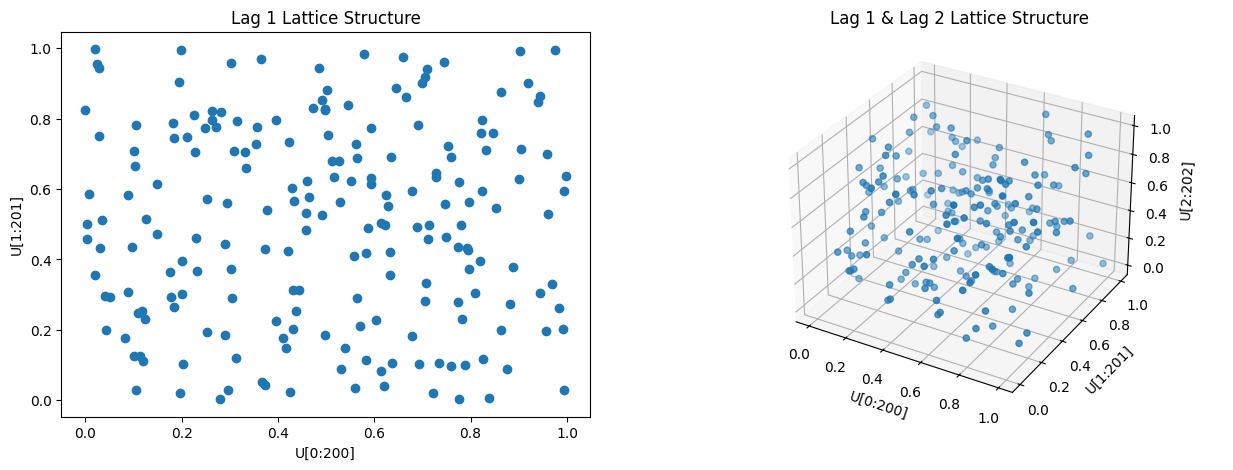

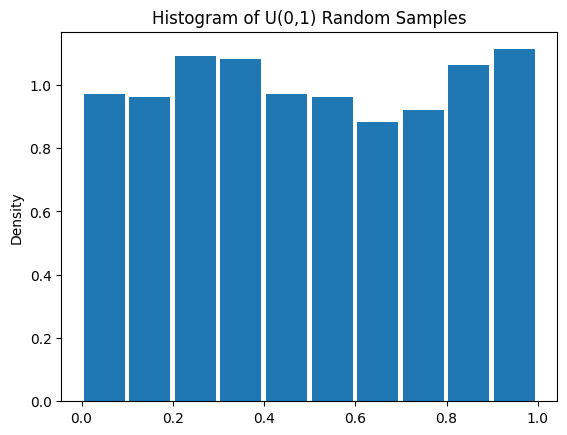

In [4]:
# RNG Checking
U = lfg(1000)

# Lattice Structure ===========================================================
U0, U1, U2 = U[0:200], U[1:201], U[2:202]
fig, ax = plt.subplots(1, 2, figsize = (15, 5), clear = True)

ax[0].scatter(U0, U1)
ax[0].set_title("Lag 1 Lattice Structure")
ax[0].set_xlabel('U[0:200]')
ax[0].set_ylabel('U[1:201]')

ax[1].axis('off')
ax[1] = fig.add_subplot(122, projection = '3d')
ax[1].scatter(U0, U1, U2)
ax[1].set_title("Lag 1 & Lag 2 Lattice Structure")
ax[1].set_xlabel('U[0:200]')
ax[1].set_ylabel('U[1:201]')
ax[1].set_zlabel('U[2:202]')

plt.show()

# Histograms ==================================================================
# U(0,1)
plt.figure(clear = True)

plt.title("Histogram of U(0,1) Random Samples")
plt.hist(U, density = True, rwidth = 0.9)
plt.ylabel("Density")

plt.show()

del U

---

## Sampling from Other Distributions

#### Transformation & Inversion

**Exponential Distribution** via Inverse CDF

The p.d.f. of an random variable $X\sim\text{Exp}(\lambda)$ is given by:

$$
f(x) = \lambda e^{-\lambda x} \mathbb{1}_{[0, \infty)}\qquad\implies\qquad F(x) = 1 - e^{-\lambda x}
$$

Which has the inverse CDF:

$$
F^{-1}(u) = -\frac{1}{\lambda}\log(1-u)
$$

So $X=F^{-1}(U)$ where $U\sim\text{U}(0,1)$ is an exponential random variable.

Notice that $\log(1-u)=\log(u)$ for $u\in(0,1)$, so we can simplify the inverse CDF to $F^{-1}(u) = -\frac{1}{\lambda}\log(u)$.

**Normal Distribution** via Box-Muller Transformation

Given two independent random variables $U_1, U_2\sim\text{U}(0,1)$, the following transformation yields two independent standard normal random variables $Z_1, Z_2\sim\mathcal{N}(0,1)$:

$$
\begin{aligned}
Z_1 &= \sqrt{-2\log(U_1)}\cos(2\pi U_2) \\
Z_2 &= \sqrt{-2\log(U_1)}\sin(2\pi U_2)
\end{aligned}
$$

The intuition is that this bivariate transformation's Jacobian matrix determinant is the product of two standard Normal p.d.f.s., and given the standard uniform distribution has p.d.f. of $1$, the p.d.f. after transformation is simply the Jacobian determinant, which is joint distribution of two independent $N(0,1)$ random variables.

**Log-Normal Distribution** via Normal Random Variables

Given $X\sim\mathcal{N}(\mu,\sigma^2)$, $Y=e^X$ is a log-normal random variable. The p.d.f. of $X$ is given by:

$$
f_X(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

Since $e^X$ is a monotonic function, we can use the transformation formula to obtain the p.d.f. of $Y$:

$$
f_Y(y) = f_X(\log y)\left|\frac{d}{dy}\log y\right| = \frac{1}{\sqrt{2\pi}\sigma y}\exp\left(-\frac{(\log y-\mu)^2}{2\sigma^2}\right)
$$

**Chi-square Distribution** via Sum of Squares of Normal Random Variables

With $Z_i\sim\mathcal{N}(0,1)$, Chi-square random variable is defined as:

$$
X = \sum_{i=1}^k Z_i^2 \sim \chi^2_k
$$



In [5]:
# Exponential Distribution via Inverse CDF
def rexp(n = 1, lambda_ = 1, seed = 104729):
    U = lfg(n, seed = seed)
    return -np.log(U) / lambda_

# Normal Distribution via Box-Muller Transformation
def rnorm(n = 1, mu = 0, sigma = 1, seed = 104729):
    U = lfg(n * 2, seed = seed)
    U1, U2 = U[0::2], U[1::2]
    Z = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    return Z * sigma + mu

# Log-Normal Distribution via Normal Exponential
def rlnorm(n = 1, mu = 0, sigma = 1, seed = 104729):
    Z = rnorm(n, mu, sigma, seed = seed)
    return np.exp(Z)

# Chi-Square Distribution via Sum of Normal Squares
def rchisq(n = 1, df = 1, seed = 104729):
    Z = rnorm(n * df, seed = seed).reshape(n, df)
    return np.sum(Z**2, axis = 1)

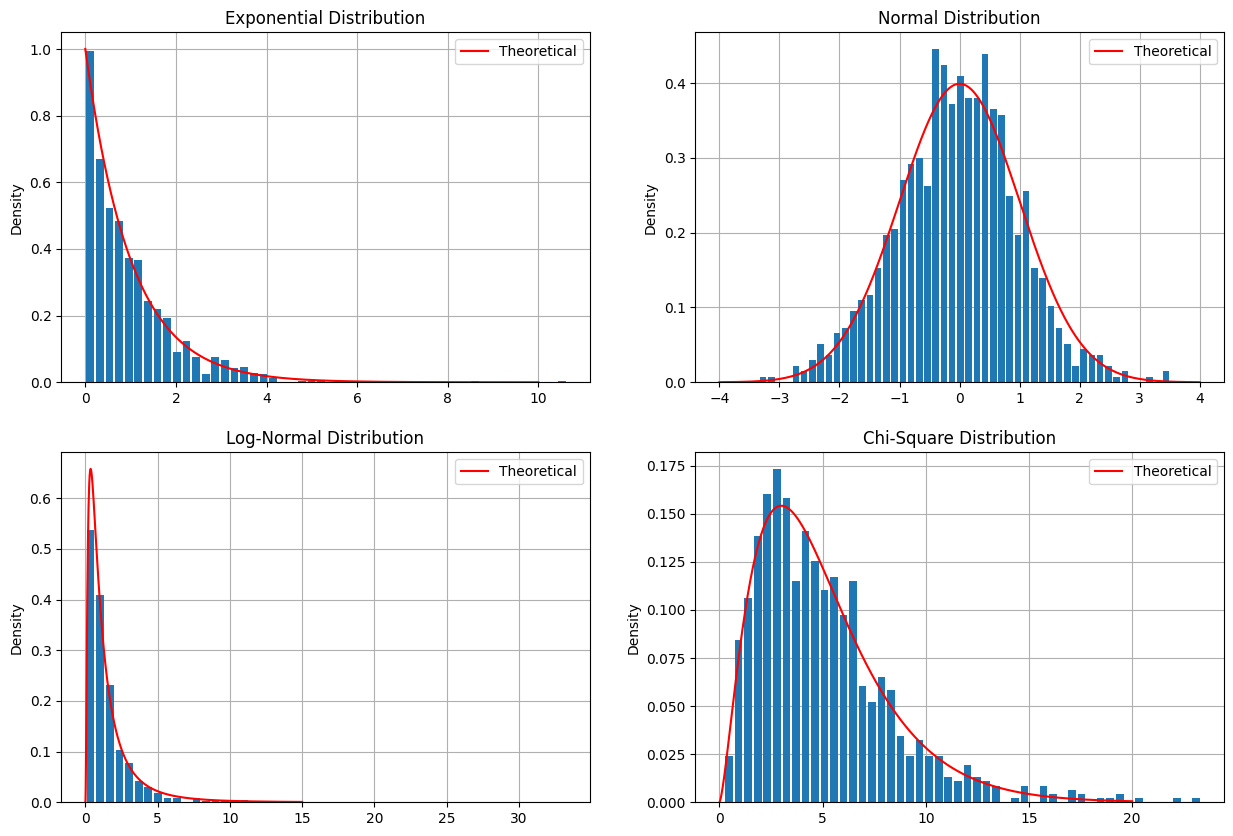

In [34]:
sample_exp = rexp(1000)
sample_norm = rnorm(1000)
sample_lnorm = rlnorm(1000)
sample_chisq = rchisq(1000, 5)

# Histograms ==================================================================
fig, ax = plt.subplots(2, 2, figsize = (15, 10), clear = True)

x = np.linspace(0, 10, 1000)
y = stats.expon.pdf(x, scale = 1)
ax[0, 0].set_title("Exponential Distribution")
ax[0, 0].hist(sample_exp, density = True, bins = 50, rwidth = 0.8)
ax[0, 0].plot(x, y, 'r', label = "Theoretical")

ax[0, 0].legend()
ax[0, 0].grid()
ax[0, 0].set_ylabel("Density")

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, loc = 0, scale = 1)
ax[0, 1].set_title("Normal Distribution")
ax[0, 1].hist(sample_norm, density = True, bins = 50, rwidth = 0.8)
ax[0, 1].plot(x, y, 'r', label = "Theoretical")

ax[0, 1].legend()
ax[0, 1].grid()
ax[0, 1].set_ylabel("Density")

x = np.linspace(0, 15, 1000)
y = stats.lognorm.pdf(x, s = 1, scale = np.exp(0))
ax[1, 0].set_title("Log-Normal Distribution")
ax[1, 0].hist(sample_lnorm, density = True, bins = 50, rwidth = 0.8)
ax[1, 0].plot(x, y, 'r', label = "Theoretical")

ax[1, 0].legend()
ax[1, 0].grid()
ax[1, 0].set_ylabel("Density")

x = np.linspace(0, 20, 1000)
y = stats.chi2.pdf(x, df = 5)
ax[1, 1].set_title("Chi-Square Distribution")
ax[1, 1].hist(sample_chisq, density = True, bins = 50, rwidth = 0.8)
ax[1, 1].plot(x, y, 'r', label = "Theoretical")

ax[1, 1].legend()
ax[1, 1].grid()
ax[1, 1].set_ylabel("Density")

plt.show()

#### Acceptance-Rejection

**Normal Distribution** via Acceptance-Rejection using Laplace Distribution

The p.d.f. of a standard normal random variable is given by:

$$
f(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}x^2\right)
$$

We will use the standard Laplace distribution (double-sided exponential) as the proposal distribution, which has the p.d.f.:

$$
g(x) = \frac{1}{2}\exp(-|x|)
$$

To ensure the p.d.f. of the proposal distribution is always greater than the p.d.f. of the target distribution, we multiply $f(x)$ by a constant $c$:

$$
c = \sqrt{2e/\pi}
$$


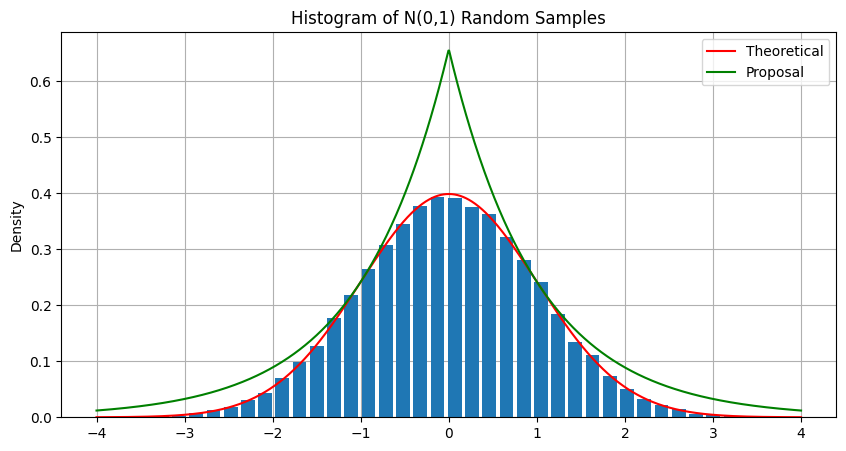

In [43]:
def dnorm(x, mu = 0, sigma = 1):
    return stats.norm.pdf(x, mu, sigma)

def dlaplace(x, mu = 0, sigma = 1):
    return stats.laplace.pdf(x, mu, sigma)

def sample_n01(n=1, seed=104729):
    np.random.seed(seed)
    samples = []
    c = np.sqrt(2 * np.exp(1) / np.pi) # Multiplicative constant to ensure dnorm(x) <= c * dlaplace(x)

    while len(samples) < n:
        x = np.random.laplace()
        u = np.random.uniform()
        if u <= dnorm(x) / (dlaplace(x) * c):
            samples.append(x)
    return samples

# Plotting ====================================================================

plt.figure(figsize = (10, 5), clear = True)
plt.title("Histogram of N(0,1) Random Samples")
plt.hist(sample_n01(50000), density = True, bins = 40, rwidth = 0.8)

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, loc = 0, scale = 1)
plt.plot(x, y, 'r', label = "Theoretical")

x = np.linspace(-4, 4, 1000)
y = stats.laplace.pdf(x, loc = 0, scale = 1) * np.sqrt(2 * np.exp(1) / np.pi)
plt.plot(x, y, 'g', label = "Proposal")


plt.ylabel("Density")
plt.legend()
plt.grid()

plt.show()

In [ ]:
# Manual Bilateral Exponential ====================================================================
J = np.zeros((N_STEPS, N_SIMS))
for i in range(0, N_STEPS):
    for j in range(0, N_SIMS):
        if U[i, j] >= P:
            J[i, j]= (-1 / ETA1) * np.log((1 - U[i, j]) / P)
        elif U[i, j] < P:
            J[i, j]= (1 / ETA2) * np.log(U[i, j] / (1 - P))
J = (np.exp(J)-1) * N